In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import warnings
warnings.filterwarnings('ignore')

# 1. Import data

In [38]:
train = pd.read_csv("train.csv")#.values
test = pd.read_csv("test.csv")#.values

In [39]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [30]:
train = pd.DataFrame(train)
train = train.sample(frac = .15)
test = pd.DataFrame(test)
test = test.sample(frac = .15)

In [31]:
print(train.shape)
print(test.shape)
train.columns

(6300, 785)
(4200, 784)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [30]:
X = train.drop('label',axis = 1)
Y = train['label']
X.shape

(42000, 784)

# 2. Dimensionality Reduction using PCA
#### a. Plot graph of component vs. cumulative explained variance .
#### This graph will help us in choosing the no of components for training our data.

In [31]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [32]:
#Doing the PCA on the train data
pca.fit_transform(X)

array([[-6.61595780e+02, -6.99311328e+02,  1.83282040e+02, ...,
         2.00403018e-14,  2.50840534e-14,  4.06280895e-14],
       [ 1.70145168e+03, -3.60551556e+02, -5.01805594e+02, ...,
         4.22408244e-14, -1.25972259e-14, -1.30483980e-15],
       [-8.86894434e+02, -2.93765782e+02,  6.71553099e+01, ...,
         1.61808790e-14,  1.84728872e-14,  1.24328826e-14],
       ...,
       [ 3.36269982e+02,  9.50015280e+02, -1.68605414e+02, ...,
         1.69545359e-15,  6.42866392e-15, -8.24873996e-16],
       [ 3.27399392e+02,  6.20160894e+01,  6.97536401e+02, ...,
        -1.67462453e-15, -6.85946524e-15, -2.07026628e-16],
       [-3.64249200e+02,  4.18893026e+02,  6.28998232e+01, ...,
         6.49917610e-15,  2.19522218e-15, -1.28747796e-15]])

In [33]:
pca.components_

array([[ 8.56060477e-17,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.24403848e-17,  1.66533454e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.79746669e-18, -7.97972799e-17, -1.66533454e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -1.00000000e+00],
       [ 9.99998589e-01,  9.06319673e-05,  6.49983994e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [21]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1]})
pcs_df.head()

,PC1,PC2
0,8.560605e-17,-5.244038e-17
1,0.000000e+00,1.665335e-16
2,0.000000e+00,0.000000e+00
3,0.000000e+00,2.775558e-17
4,0.000000e+00,6.938894e-18


In [22]:
pca.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

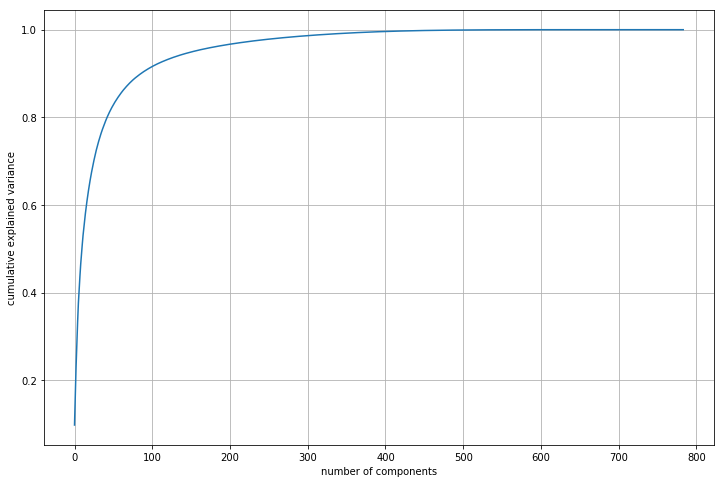

In [35]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(True, which = 'both')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [36]:
pca = PCA(n_components= 0.85)
X = pca.fit_transform(X)
X.shape

(42000, 59)

In [41]:
    # standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X.shape

(42000, 59)

In [44]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=100)

In [19]:
    # standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(X_train)

In [16]:
# linear model
from sklearn.svm import SVC
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)


KeyboardInterrupt: 

In [43]:
# predict
y_pred = model_linear.predict(X_test)

In [44]:
# confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8928571428571429 

[[119   1   0   1   0   3   2   2   0   0]
 [  0 115   0   0   0   0   0   0   0   0]
 [  1   0 103   0   2   0   1   1   3   0]
 [  0   1   3 125   0   9   0   2   3   2]
 [  1   0   0   0 101   2   1   2   0   6]
 [  1   0   4   4   0 104   3   0   4   2]
 [  2   1   6   0   3   1 114   0   1   0]
 [  1   3   3   2   0   0   0 135   0   4]
 [  0   1   7   7   2   1   0   0 102   1]
 [  0   1   1   5   8   1   0   3   3 107]]


In [45]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
# predict
y_pred = non_linear_model.predict(X_test)

In [47]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.942063492063492 

[[122   0   1   1   0   0   3   0   1   0]
 [  0 113   0   1   0   0   0   1   0   0]
 [  1   0 106   0   1   0   1   1   1   0]
 [  0   1   3 131   0   5   0   2   2   1]
 [  0   0   0   0 104   0   2   0   1   6]
 [  0   0   0   1   0 118   3   0   0   0]
 [  1   0   1   0   1   1 123   0   1   0]
 [  0   2   2   1   1   0   0 137   0   5]
 [  0   1   1   1   1   0   0   0 117   0]
 [  0   0   1   4   5   1   0   1   1 116]]


In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 4, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, .01, 100]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.2min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 0.01, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [49]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.323744,0.241878,0.355297,0.041193,1,0.01,"{'C': 1, 'gamma': 0.01}",0.937302,0.944444,0.938095,0.934127,0.938492,0.003744,2,0.979101,0.980423,0.979101,0.983333,0.980489,0.001728
1,2.372891,0.105951,0.708846,0.078408,1,0.001,"{'C': 1, 'gamma': 0.001}",0.876984,0.892857,0.896032,0.887302,0.888294,0.007239,5,0.907407,0.903175,0.903968,0.906349,0.905225,0.001718
2,4.777264,0.172634,0.815036,0.059168,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.400794,0.322222,0.292063,0.349206,0.341071,0.039969,6,0.436243,0.347354,0.315344,0.359788,0.364683,0.044383
3,5.405655,0.789177,1.211555,0.306897,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.124603,0.115079,0.111111,0.119048,0.117460,0.004988,7,0.115079,0.117989,0.119312,0.116667,0.117262,0.001569
4,4.961910,0.133578,0.825528,0.025501,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.123810,0.115079,0.111111,0.119048,0.117262,0.004708,8,0.115079,0.117989,0.119312,0.116667,0.117262,0.001569
5,4.854470,0.081021,0.905983,0.018864,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.123810,0.115079,0.111111,0.119048,0.117262,0.004708,8,0.115079,0.117989,0.119312,0.116667,0.117262,0.001569
6,1.588091,0.010262,0.468481,0.061750,100,0.01,"{'C': 100, 'gamma': 0.01}",0.944444,0.953968,0.948413,0.943651,0.947619,0.004086,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,1.007673,0.007115,0.253106,0.006054,100,0.001,"{'C': 100, 'gamma': 0.001}",0.927778,0.918254,0.928571,0.925397,0.925000,0.004066,3,0.991005,0.989683,0.987302,0.992593,0.990146,0.001938
8,1.118864,0.051411,0.307075,0.056903,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.912698,0.919841,0.922222,0.904762,0.914881,0.006813,4,0.938360,0.941005,0.944180,0.941534,0.941270,0.002066


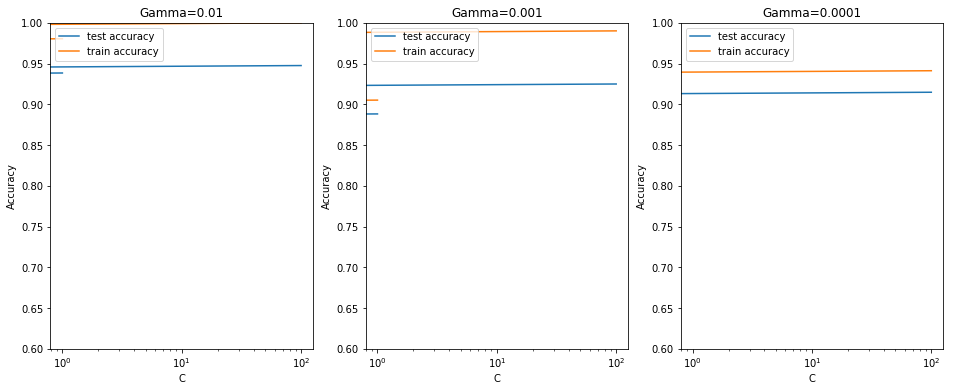

In [50]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [51]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9476190476190476 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [52]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")



accuracy 0.9492063492063492 

[[122   0   1   1   0   0   3   0   1   0]
 [  0 114   0   0   0   0   0   1   0   0]
 [  0   0 106   1   1   0   1   1   1   0]
 [  0   1   3 134   0   2   0   2   2   1]
 [  0   0   0   0 105   0   2   1   0   5]
 [  0   0   0   1   0 118   3   0   0   0]
 [  1   0   0   0   1   1 124   0   1   0]
 [  0   2   2   1   2   0   0 140   0   1]
 [  0   1   1   3   1   0   0   0 115   0]
 [  0   0   1   4   4   0   0   1   1 118]] 



In [40]:
test_pca = pca.transform(test)
test_pca.shape

(28000, 59)

In [42]:
test_scaled = standard_scaler.transform(test_pca)

In [43]:
test_scaled.shape

(28000, 59)

In [45]:
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
pred_probs_test2 = model.predict(test_scaled)
#"{:2.2f}".format(metrics.roc_auc_score(test, pred_probs_test2))

In [51]:
image_id = np.arange(1,pred_probs_test2.shape[0]+1)

In [53]:
pd.DataFrame({"ImageId": image_id, "Label": pred_probs_test2}).to_csv('out_svm.csv', 
                                                                      index=False, header=True)